In [1]:
# Scipy es la librería matemática.
# Incluye una enorme cantidad de módulos y operaciones.

# Tomado de: https://docs.scipy.org/doc/scipy/tutorial/stats.html

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Integrales.
from scipy import integrate
# Optimizar.
from scipy import optimize
# Estadística.
from scipy import stats

In [2]:
# Integración numérica.

x = np.linspace(0, 100, 10000)
y = np.exp(x)

# Trapezoidal.
I_t = integrate.trapezoid(x, y)
print(f"Fórmula trapezoidal: {I_t:.7e}")

# Simpson.
I_t = integrate.simpson(x, y)
print(f"Fórmula de Simpson: {I_t:.7e}")

Fórmula trapezoidal: 2.6612357e+45
Fórmula de Simpson: 2.6612360e+45


In [45]:
# Optimización
# En ingeniería encontramos muchos problemas de optimización o que
# requieren soluciones numéricas.

# Creamos una función.
def f(x):
    return (x - 2) * x * (x + 2) ** 2 + 2

# Encontramos el mínimo.
print( optimize.minimize_scalar(f) )
print()

# Encontramos los 0.
print( optimize.fsolve(f, x0 = 0) )
print()

# ¿En qué valor f es 42?
def f_42(x):
    return f(x) - 42
print( optimize.fsolve(f_42, x0 = 10) )
print( optimize.fsolve(f_42, x0 = -10) )

     fun: -7.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458

[0.22741575]

[2.68093787]
[-3.45636065]


<function matplotlib.pyplot.show(close=None, block=None)>

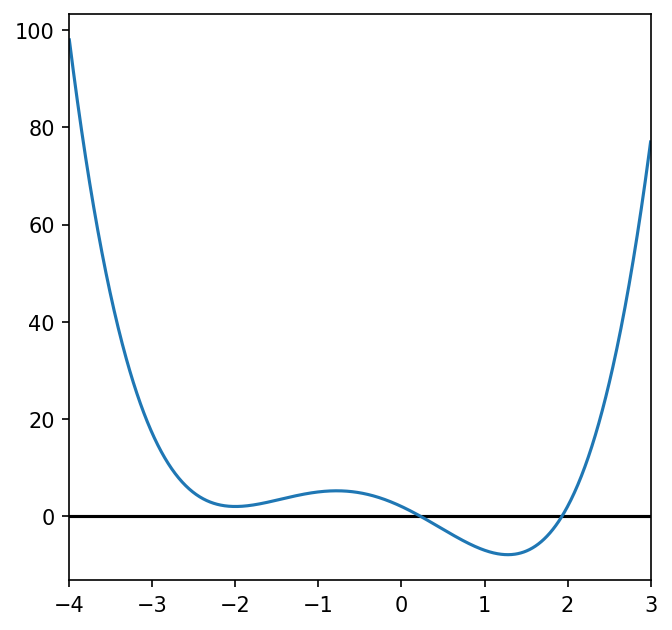

In [53]:
# Graficamos para ver la función.
lim = [-4, 3]
x = np.linspace(*lim, 1000)
y = f(x)

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

# Graficamos.
ax.plot(lim, [0, 0], color = "k")
ax.plot(x, y)

# Estilo
ax.set_xlim(*lim)

plt.show

# Distribuciones continuas

0.05399096651318806
0.9772498680518208


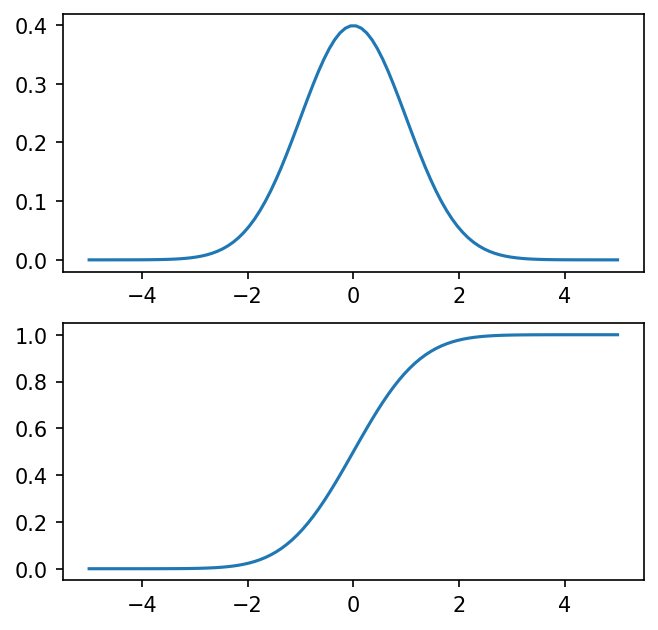

In [113]:
# Distribución normal.

# Incializamos gráfica.
fig, ax = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

x = np.linspace(-5, 5, 100)

# PDF: función de densidad de probabilidad.
ax[0].plot(x, stats.norm.pdf(x))
# CDF: función de probabilidad acumulada.
ax[1].plot(x, stats.norm.cdf(x))

# También es posible obtener un solo valor.
print(stats.norm.pdf(2))
print(stats.norm.cdf(2))

plt.show()

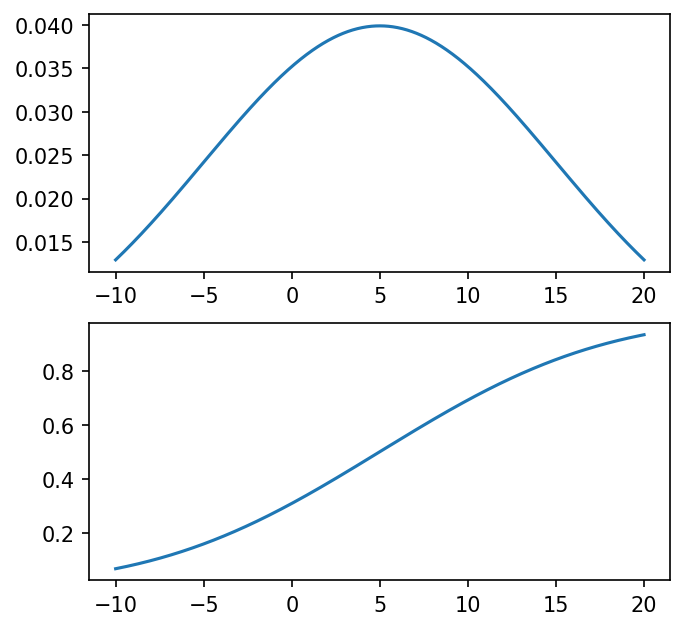

In [25]:
# Distribución normal con parámetros.

# Incializamos gráfica.
fig, ax = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

x = np.linspace(-10, 20, 1000)

mu = 5
sigma = 10

ax[0].plot(x, stats.norm.pdf(x, loc = mu, scale = sigma))
ax[1].plot(x, stats.norm.cdf(x, loc = mu, scale = sigma))

plt.show()



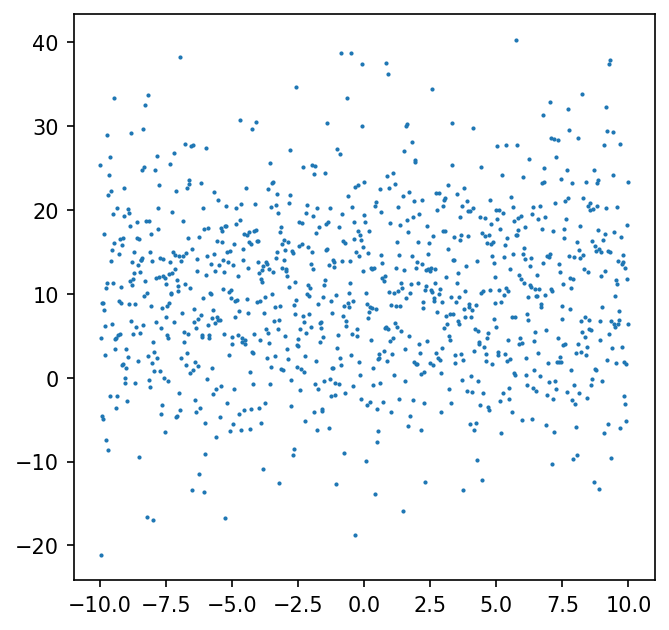

In [107]:
# Variables aleatorias.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

mu = 10
sigma = 10

x = np.linspace(-10, 10, 1000)
r = stats.norm.rvs(size = 1000, loc = mu, scale = sigma,
    random_state = np.random.default_rng(np.random.SeedSequence().entropy) )


ax.scatter(x, r, s = 1)

plt.show()

In [41]:
# Percentiles.

print( stats.norm.ppf(0.01) )
print( stats.norm.ppf(0.5) )
print( stats.norm.ppf(0.8) )

-2.3263478740408408
0.0
0.8416212335729143


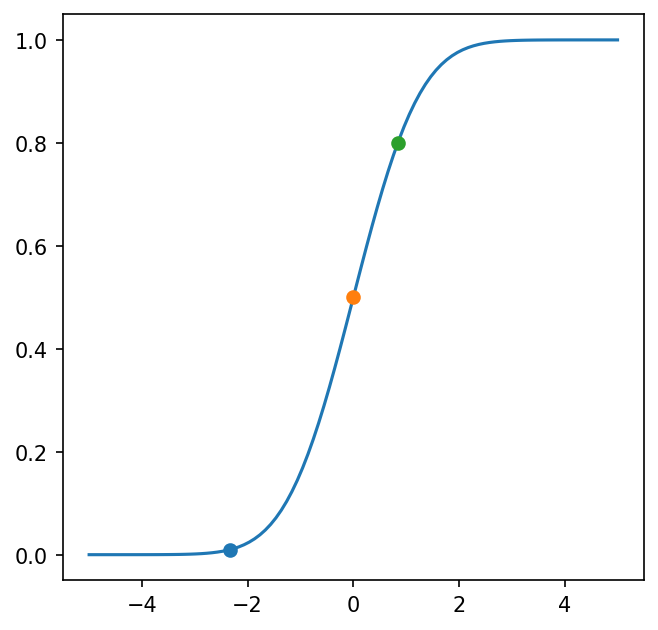

In [44]:
# Distribución normal.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

x = np.linspace(-5, 5, 100)

ax.plot(x, stats.norm.cdf(x), zorder = 0)

for i in [0.01, 0.5, 0.8]:
    ax.scatter(stats.norm.ppf(i), i)

plt.show()

In [56]:
# Estadísticos.

est = stats.norm.stats(loc = mu, scale = sigma, moments = "mvsk")
names = ["media   ", "varianza", "sesgo   ", "curtosis"]

# range(a) es igual a range(0, a)
for i in range(len(est)):
    print(f"{names[i]}: {est[i]:7.3f}")

media   :  10.000
varianza: 100.000
sesgo   :   0.000
curtosis:   0.000


1
a


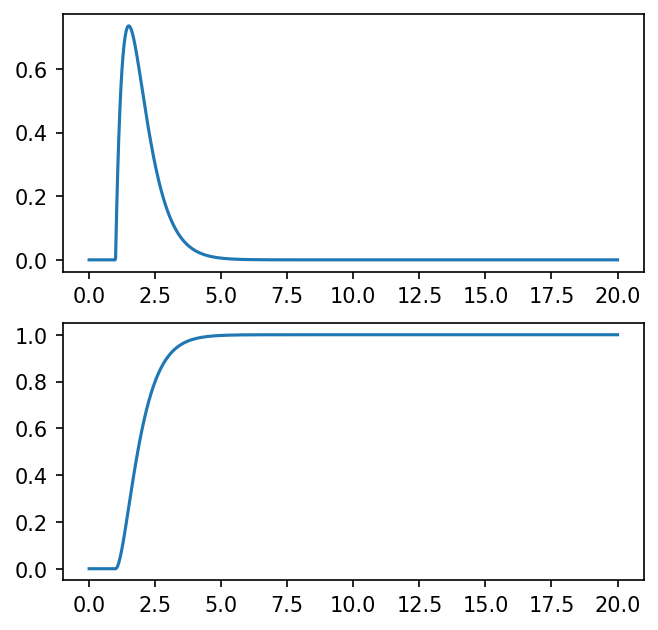

In [109]:
# Distribución gamma.

# Todas las distribuciones continuas tienen escala y ubicación.
# Podemos saber cuántos parámetros adicionales hay.
print( stats.gamma.numargs )
print( stats.gamma.shapes )

# Incializamos gráfica.
fig, ax = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

x = np.linspace(0, 20, 1000)

loc = 1
beta = 2
a = 2
scale = 1 / beta

# PDF: función de probabilidad de densidad.
ax[0].plot(x, stats.gamma.pdf(x, a = a, loc = loc, scale = scale))
# CDF: función de probabilidad acumulada.
ax[1].plot(x, stats.gamma.cdf(x, a = a, loc = loc, scale = scale))

plt.show()

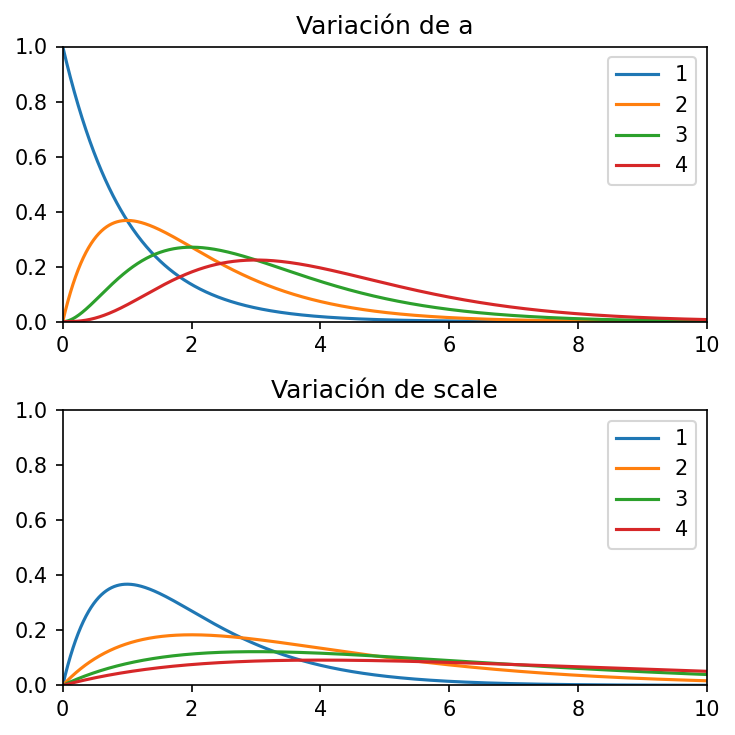

In [86]:
# Distribución gamma.

# Incializamos gráfica.
fig, ax = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

x = np.linspace(0, 10, 1000)

beta = 2
a = [1, 2, 3, 4]
s = [1, 2, 3, 4]

for i in a:
    ax[0].plot(x, stats.gamma.pdf(x, a = i))
for i in s:
    ax[1].plot(x, stats.gamma.pdf(x, a = 2, scale = i))

for i in ax:
    i.set_ylim(0, 1)
    i.set_xlim(0, 10)

ax[0].legend(a)
ax[1].legend(s)

ax[0].set_title("Variación de a")
ax[1].set_title("Variación de scale")

fig.tight_layout()
plt.show()

# Distribuciones discretas

1
mu


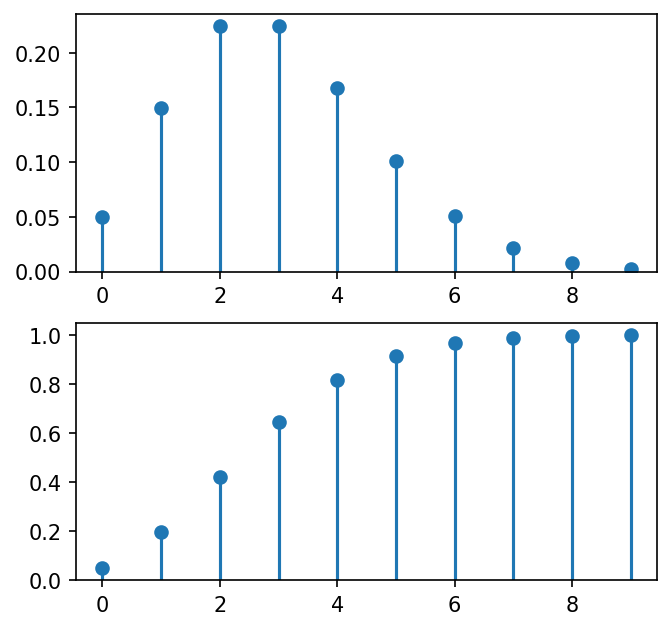

In [112]:
# Distribución de poisson.

# Todas las distribuciones discretas tienen ubicación.
# Podemos saber cuántos parámetros adicionales hay.
print( stats.poisson.numargs )
print( stats.poisson.shapes )

# Incializamos gráfica.
fig, ax = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

# arange(a, b) es igual a arange(a, b, 1)
x = np.arange(0, 10)

mu = 3

# Es posible inicializar una distribución con sus parámetros
ps = stats.poisson( mu = mu )

# PDF: función de masa de probabilidad.
ax[0].scatter(x, ps.pmf(x))
ax[0].vlines(x, 0, ps.pmf(x))
# CDF: función de probabilidad acumulada.
ax[1].scatter(x, ps.cdf(x))
ax[1].vlines(x, 0, ps.cdf(x))

for i in ax:
    i.set_ylim(0)

plt.show()

# La distribución también cuenta con rvs, ppf, y stats.

# Estadística inferencial

mu: -0.000, sigma: 1.000


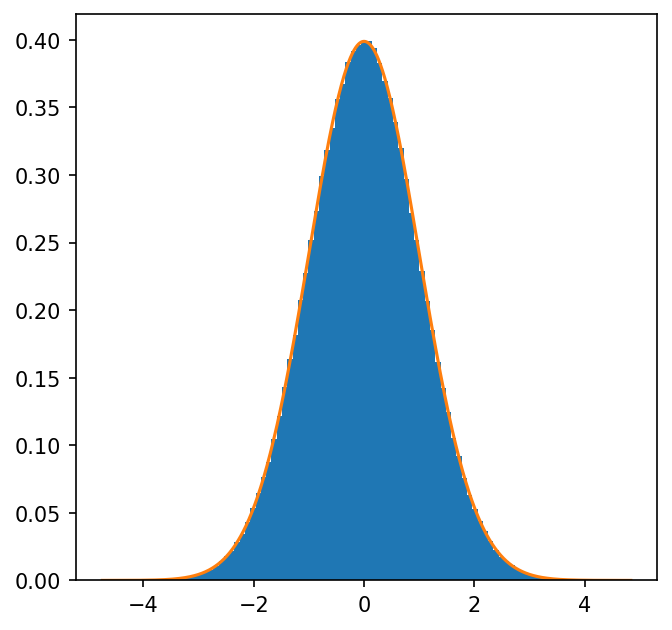

In [153]:
# Ajuste de distribución

# Datos aleatorios.
n = np.random.randn(1000000)

mu, sigma = stats.norm.fit(n)

print(f"mu: {mu:.3f}, sigma: {sigma:.3f}")

# Distribución ajustada
x = np.linspace(n.min(), n.max(), 1000000)
dist_n = stats.norm(loc = mu, scale = sigma)
y = dist_n.pdf(x)

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

# Histograma
ax.hist(n, density = True, bins = 100)
# Distribución ajustada.
ax.plot(x, y)

plt.show()

In [164]:
# Prueba t de Student para el ajuste de la media.
# p debe ser lo más alto posible en este caso,
# muchas veces se establece el nivel de confianza de 0.95.

# valor ligeramente diferente de la media real
Student = stats.ttest_1samp(n, -.002)
print( Student )
print( f"p: {Student.pvalue:.3f}" )
print()

# media real
Student = stats.ttest_1samp(n, mu)
print( Student )

Ttest_1sampResult(statistic=1.839257898252342, pvalue=0.06587755865332122)
p: 0.066

Ttest_1sampResult(statistic=0.0, pvalue=1.0)


(-4.744585240342452, 4.744424995434808)
-0.00016024490764454669
Ttest_1sampResult(statistic=-1.1676411498037773e-13, pvalue=0.9999999999999069)


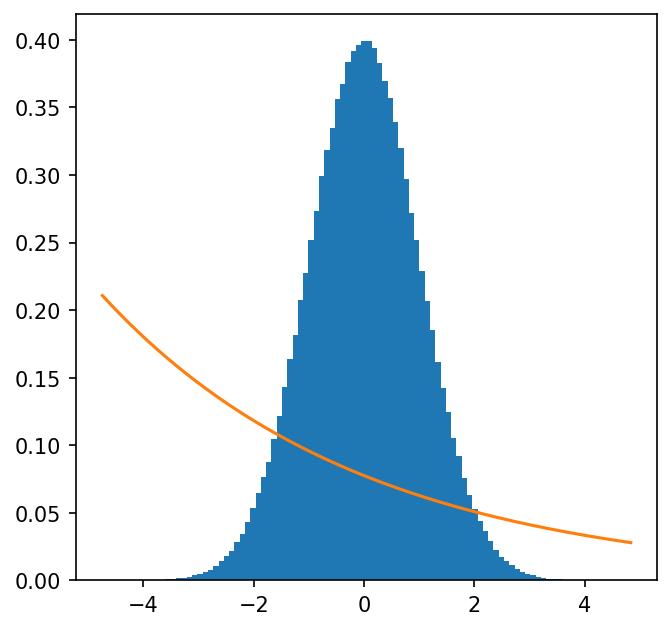

In [163]:
# Ahora con una distribución Exponencial.
param = stats.expon.fit(n)
print(param)

# *lista separa los elementos como argumentos de una función.
dist_e = stats.expon(*param)
m = dist_e.stats("m")
print(m)

Student = stats.ttest_1samp(n, m)
print( Student )

# Distribución ajustada
x = np.linspace(n.min(), n.max(), 1000000)
y = dist_e.pdf(x)

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

# Histograma
ax.hist(n, density = True, bins = 100)
# Distribución ajustada.
ax.plot(x, y)

plt.show()

KstestResult(statistic=0.0005766688067607717, pvalue=0.8933897044901595)
KstestResult(statistic=0.42994337467206684, pvalue=0.0)


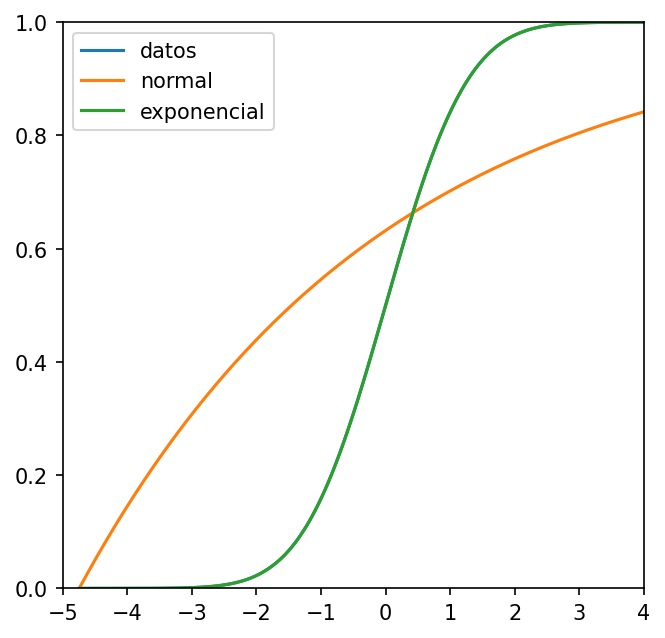

In [180]:
# Prueba Kolmogorov Smirnoff de bondad de ajuste a la distribución.
# Es parecida a la prueba CHI cuadrada pero sin requeridad muestrear la
# distribución continua, se trabajar con la probabilidad acumulada.

# Normal
print(stats.kstest(n, dist_n.cdf))

# Exponencial
print(stats.kstest(n, dist_e.cdf))

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(5, 5)
fig.set_dpi(150) 

# Frecuencias acumuladas.
ax.plot(x, dist_n.cdf(x))
ax.plot(x, dist_e.cdf(x))


# Graficamos los datos acumulados.
# el argumento en y es i / N, con i = 1, 2, ..., N, N: cantidad de datos.
ax.plot(np.sort(n), np.array( range(1, len(n) + 1) ) / ( len(n) + 1 ),
    drawstyle = "steps")

# Estilo.
ax.legend(["datos", "normal", "exponencial"])
ax.set_ylim(0, 1)
ax.set_xlim(-5, 4)

plt.show()

LinregressResult(slope=-0.007502331996538275, intercept=0.10600794270994435, rvalue=-0.00751656559348302, pvalue=0.9408339988171832, stderr=0.10082112064600354, intercept_stderr=0.1013349465150463)


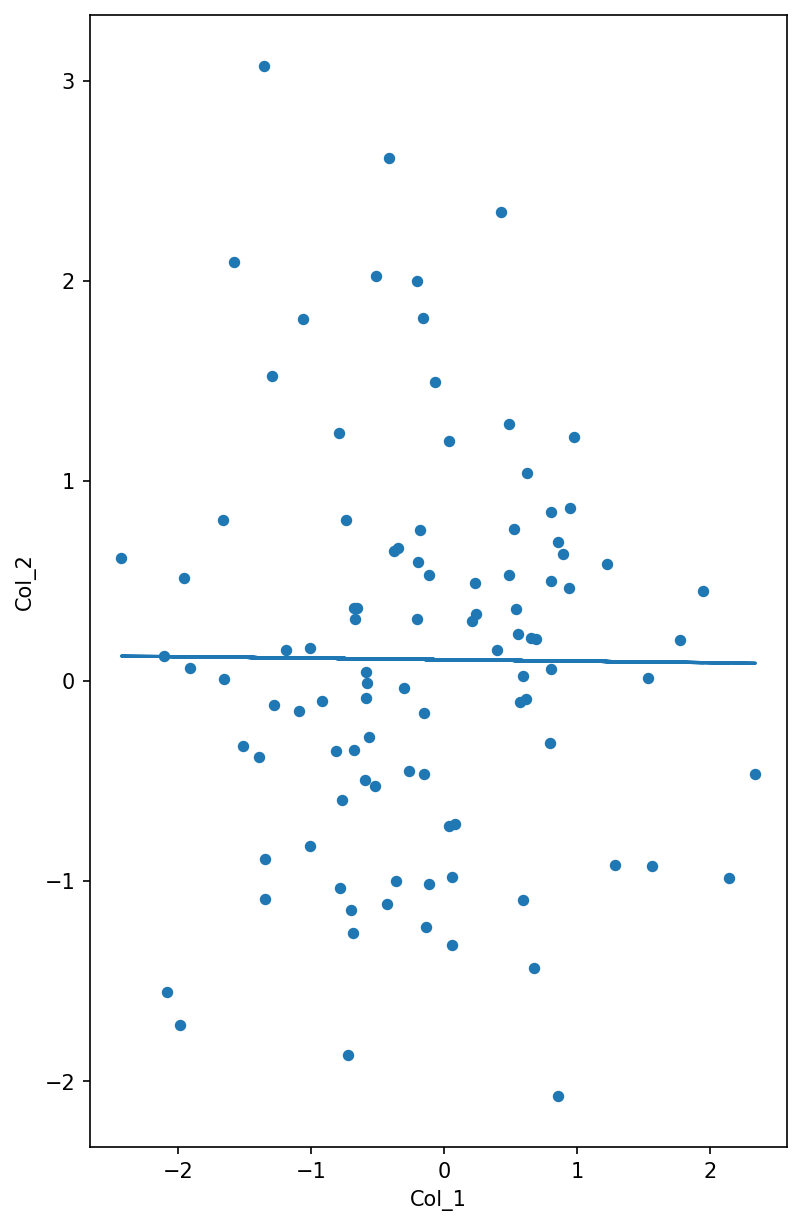

In [191]:
# Regresión lineal.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 10)
fig.set_dpi(150) 

# Creamos un dataframe aleatorio.
df = pd.DataFrame(np.random.randn(100,2), columns = ["Col_1", "Col_2"])

# Regresión
reg = stats.linregress(df)
# el valor p se refiere a la hipótesis nula donde la pendiente es 0.
# En este caso queremos que p sea menor al valor de confianza, 0.05.
print(reg)
y = reg.intercept + df["Col_1"] * reg.slope

df.plot("Col_1", "Col_2", ax = ax, kind = "scatter")
ax.plot(df["Col_1"], y)

In [ ]:
# del archivo de consumo eléctrico, selecciona el consumo en tarifa 1 para
# los municipios del estado de méxico.
# Escoge tres municipios, para cada uno ajusta la distriibución normal,
# gamma, beta, y chi cuadrada.
# Haz las pruebas de media y bondad de ajuste.